## L1-LRA Approximation vs PCA

Importing the required library. If you didn't download likelihood_source, go to [likelihoodratiomap]("https://github.com/hazandaglayan/likelihoodratiomap").

In [11]:
from vip_hci.fits import open_fits
from vip_hci.var import frame_center
from vip_hci.fm import normalize_psf
from utils import pixels_in_annulus
from norm_lowrank import norm_low_rank
from hciplot import plot_frames
import sys
# setting path
sys.path.append('..')
from likelihood_source import likelihoodmap


Import libraries. We use exoplanet challange dataset *sph3*. You can download it from [webpage of exoplanet imaging data challange]("https://exoplanet-imaging-challenge.github.io/datasets1/").

In [2]:
test_set = 'sphere_irdis'
test_no = '3'

In [3]:
datpath = 'datasets/subchallenge_1/'
cubename = datpath+'{}_cube_{}.fits'.format(test_set, test_no)
psfname = datpath+'{}_psf_{}.fits'.format(test_set, test_no)
angname = datpath+'{}_pa_{}.fits'.format(test_set, test_no)

In [4]:
cube, header_cube = open_fits(cubename, header=True)
psf = open_fits(psfname)
derot_angles = open_fits(angname)

Fits HDU-0 data and header successfully loaded. Data shape: (228, 160, 160)
Fits HDU-0 data successfully loaded. Data shape: (41, 41)
Fits HDU-0 data successfully loaded. Data shape: (228,)


In [5]:
cy, cx = frame_center(cube)
print('Centre of the image frame:', cy,',', cx)

Centre of the image frame: 80 , 80


Normalize psf and calculate fwhm.

In [6]:
psfn, flux_st, fwhm = normalize_psf(psf, fwhm='fit', full_output=True, size=10)

`Force_odd` is True therefore `size` was set to 11

Mean FWHM: 3.922
Flux in 1xFWHM aperture: 0.998


Select pixels for calculating likelihoodratios.

In [7]:
nfr, m, n = cube.shape 
pixels = pixels_in_annulus(cube[0].shape, (cy,cx), 6, m/2-fwhm/2)

Apply annular PCA.

In [8]:
res_l2 = norm_low_rank(cube, derot_angles, asize=4, ncomp=6, norm=2, imlib='vip-fft', full_output=True)#opencv
cube_out_l2, _, _ = res_l2


Apply likelihoodratio map using $\ell_2$ norm.

In [9]:
fluxmap_l2l2, loglr_map_l2l2 = likelihoodmap(cube_out_l2, derot_angles, psfn, pixels, fwhm=fwhm, n_jobs=8, norm=2)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   21.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   29.7s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   39.7s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:   51.2s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed:  2.9mi

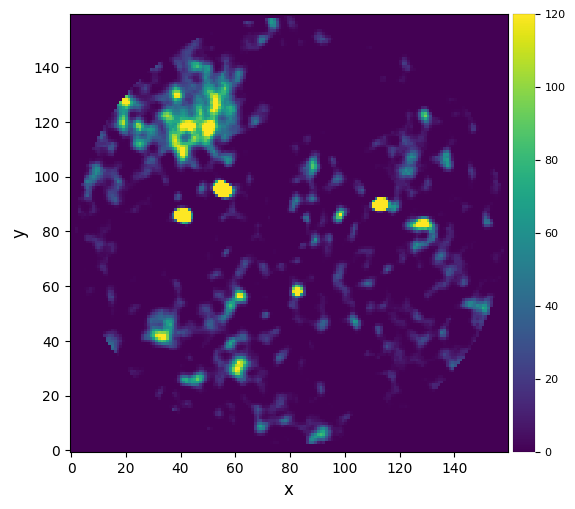

In [18]:
plot_frames(loglr_map_l2l2, vmax=120)

Apply likelihoodratio map using $\ell_1$ norm.

In [19]:
fluxmap_l2l1, loglr_map_l2l1 = likelihoodmap(cube_out_l2, derot_angles, psfn, pixels, fwhm=fwhm, n_jobs=8, norm=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   15.8s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   23.6s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   33.4s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   45.0s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:   58.7s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed:  3.4mi

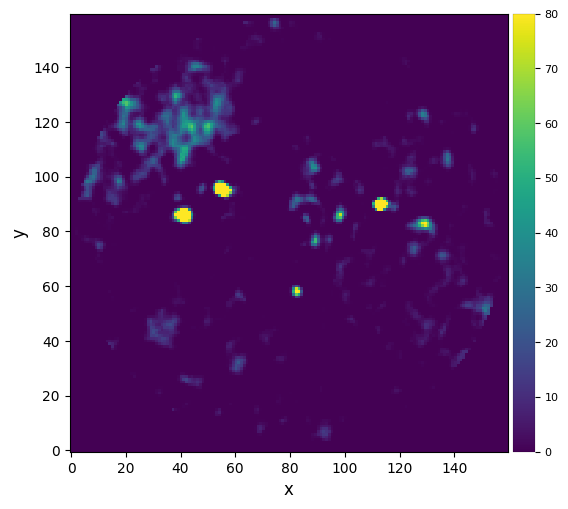

In [20]:
plot_frames(loglr_map_l2l1, vmax=80)

Apply annular L1-LRA.

In [21]:
res_l1 = norm_low_rank(cube, derot_angles, asize=4, ncomp=6, norm=1, imlib='vip-fft', full_output=True)#opencv
cube_out_l1, _, _ = res_l1

Apply likelihoodratio map using $\ell_1$ norm.

In [22]:
fluxmap_l1l1, loglr_map_l1l1 = likelihoodmap(cube_out_l1, derot_angles, psfn, pixels, fwhm=fwhm, n_jobs=8, norm=1)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   23.6s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   33.1s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:   44.2s
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:   57.1s
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed:  3.3mi

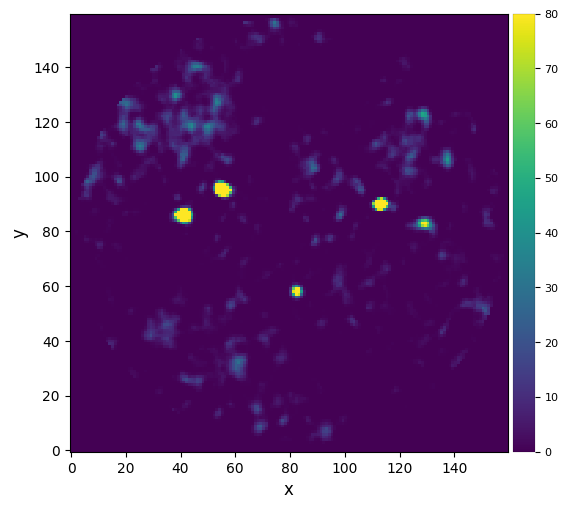

In [23]:
plot_frames(loglr_map_l1l1, vmax=80)